**Activity:** Prelim Skills Exam

**Name:** Castillo, Maria Antonette O.

**Section:** CPE32S8

**Instructor:** Engr. Roman Richard


--------------------------------

## **Contents:**

1. Data Preprocessing
2. Training the CNN Model from Scratch
3. Training the CNN Model using the Modified Pre-trained Model (VGG19)
4. Testing Both Models using Test Data
5. Conclusion
    

-------------------

In [185]:
# Importing Libraries

import os
from glob import glob

# Pandas & Numpy import
import pandas as pd
import numpy as np

# Matplotlib and Seaborn imports for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# OpenCV import
import cv2

# Keras import
import keras

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D

# Scikit-learn imports
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, multilabel_confusion_matrix

---

## **Data Preprocessing**

In [2]:
# Loading the Data Entry csv

dataset = pd.read_csv(r'C:\Users\maria\Downloads\archive\Data_Entry_2017.csv')
dataset

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [3]:
# Counting the labels

dataset['Finding Labels'].value_counts()

Finding Labels
No Finding                                                         60361
Infiltration                                                        9547
Atelectasis                                                         4215
Effusion                                                            3955
Nodule                                                              2705
                                                                   ...  
Atelectasis|Consolidation|Edema|Effusion|Infiltration|Pneumonia        1
Atelectasis|Consolidation|Effusion|Emphysema|Mass|Pneumothorax         1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax                  1
Edema|Infiltration|Pneumothorax                                        1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax         1
Name: count, Length: 836, dtype: int64

In [4]:
# Checking the dtypes

dataset.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
Unnamed: 11                    float64
dtype: object

In [5]:
label_encoder = LabelEncoder()
categorical_columns = ['Patient Gender', 'View Position']
label_encoder = LabelEncoder()

for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [6]:
# Checking the shape of dataset

dataset.shape

(112120, 12)

In [7]:
# Checking for any null values

dataset.isna().sum()

Image Index                         0
Finding Labels                      0
Follow-up #                         0
Patient ID                          0
Patient Age                         0
Patient Gender                      0
View Position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    112120
dtype: int64

In [8]:
# Dropping the Unamed: 11 column

dataset = dataset.drop("Unnamed: 11", axis=1)
dataset.tail()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,1,1,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,29,1,1,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,0,1,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,30,0,1,2048,2500,0.168,0.168
112119,00030805_000.png,No Finding,0,30805,27,1,1,2048,2500,0.171,0.171


In [9]:
# Cleaning the Finding Labels: converting the labels to a list

dataset['Finding Labels'] = dataset['Finding Labels'].apply(lambda x: x.split('|') if '|' in x else [x]).tolist()
dataset

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,[Cardiomegaly],0,1,58,1,1,2682,2749,0.143,0.143
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,1,58,1,1,2894,2729,0.143,0.143
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,1,58,1,1,2500,2048,0.168,0.168
3,00000002_000.png,[No Finding],0,2,81,1,1,2500,2048,0.171,0.171
4,00000003_000.png,[Hernia],0,3,81,0,1,2582,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,"[Mass, Pneumonia]",1,30801,39,1,1,2048,2500,0.168,0.168
112116,00030802_000.png,[No Finding],0,30802,29,1,1,2048,2500,0.168,0.168
112117,00030803_000.png,[No Finding],0,30803,42,0,1,2048,2500,0.168,0.168
112118,00030804_000.png,[No Finding],0,30804,30,0,1,2048,2500,0.168,0.168


In [10]:
# One Hot Encode the Finding Labels column

mlb = MultiLabelBinarizer(sparse_output=True)

dataset = dataset.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(dataset.pop('Finding Labels')),
                index=dataset.index,
                columns=mlb.classes_))

In [11]:
dataset.tail()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
112115,00030801_001.png,1,30801,39,1,1,2048,2500,0.168,0.168,...,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,0,30802,29,1,1,2048,2500,0.168,0.168,...,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,0,30803,42,0,1,2048,2500,0.168,0.168,...,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,0,30804,30,0,1,2048,2500,0.168,0.168,...,0,0,0,0,0,1,0,0,0,0
112119,00030805_000.png,0,30805,27,1,1,2048,2500,0.171,0.171,...,0,0,0,0,0,1,0,0,0,0


In [12]:
dataset.columns

Index(['Image Index', 'Follow-up #', 'Patient ID', 'Patient Age',
       'Patient Gender', 'View Position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]', 'Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia',
       'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening',
       'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [13]:
labels = dataset[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 
                  'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 
                  'Pneumonia', 'Pneumothorax']]

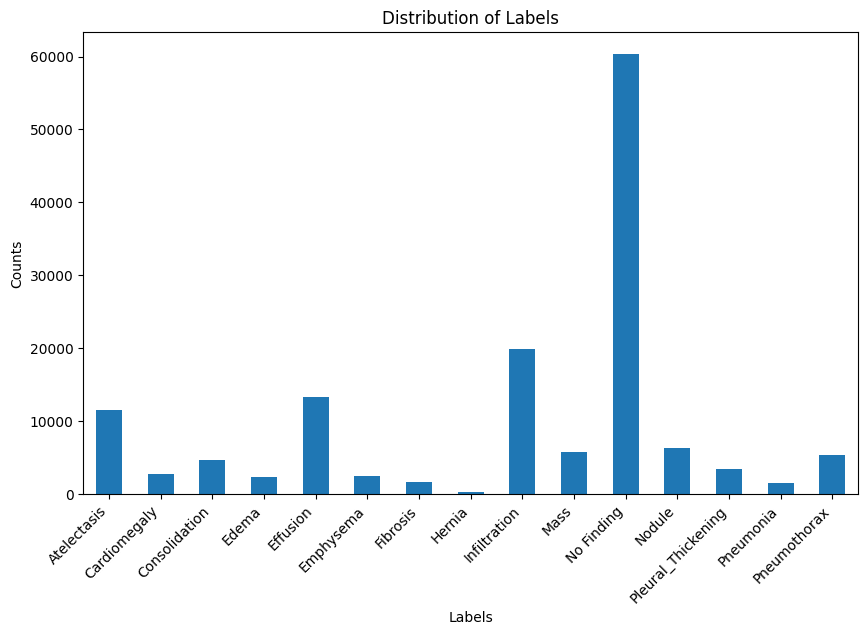

In [180]:
labels = labels.astype(int)
label_counts = labels.sum()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')  
plt.show()

#### **The graph above shows the imbalance classes of the dataset. Most images has no presence of any diseases, while infiltration is the most common, followed by effusion. Hernia has the fewest images in the dataset.**

---------------------------------------------------

### **Mapping Image Paths & Splitting into Training and Testing Set**

- Training and Testing Set is based on the given list 

In [16]:
image_paths = glob('C:/Users/maria/Downloads/archive/**/*.png', recursive=True)

# Map image filenames to their respective paths

img_path_mapping = {}
for path in image_paths:
    filename = os.path.basename(path)
    img_path_mapping[filename] = path

dataset['Paths'] = dataset['Image Index'].map(img_path_mapping.get)

In [17]:
# Training Set

labels_train = pd.read_csv(r'C:\Users\maria\Downloads\archive\train_val_list.txt')
labels_train.columns = ['Image_Index']

In [18]:
# Testing Set

labels_test = pd.read_csv(r'C:\Users\maria\Downloads\archive\test_list.txt')
labels_test.columns = ['Image_Index']

In [19]:
# Select images for training and testing using labels_train & labels_test indexes

dataset_train = dataset[dataset['Image Index'].isin(labels_train['Image_Index'])].reset_index(drop=True)
dataset_test = dataset[dataset['Image Index'].isin(labels_test['Image_Index'])].reset_index(drop=True)

In [20]:
dataset_train.shape

(86523, 26)

In [21]:
dataset_test.shape

(25595, 26)

---------------------------

## **Training the CNN Model from Scratch**

In [23]:
# Splitting the training dataset into training and validation sets

train_df, validation_df = train_test_split(dataset_train, test_size=0.2, random_state=42)

In [24]:

target_width, target_height = 64,64
batch_size = 200

# Image data augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  
    rotation_range=20,  
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,  
    zoom_range=0.2, 
    horizontal_flip=True,  
    fill_mode='nearest'  
)

# Generator for training data
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,  
    x_col='Paths',
    y_col=mlb.classes_,
    target_size=(target_width, target_height),
    batch_size=batch_size,
    class_mode='raw',  
)

# Generator for validation data
validation_generator = datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory=None,
    x_col='Paths',
    y_col=mlb.classes_,
    target_size=(target_width, target_height),
    batch_size=batch_size,
    class_mode='raw',  
)

Found 69218 validated image filenames.
Found 17305 validated image filenames.


In [25]:
# Creating the model

model = Sequential()

# 2D convolutional layer with 32 filters, kernel size of (5,5), and stride of (2,2)
model.add(Conv2D(32, (5, 5), strides=(2, 2), padding='same', input_shape=(target_width, target_height, 3)))
model.add(Activation('relu'))  # Add ReLU activation function

# Another 2D convolutional layer with 32 filters, kernel size of (5,5), and stride of (2,2)
model.add(Conv2D(32, (5, 5), strides=(2, 2)))
model.add(Activation('relu'))  # Add ReLU activation function

# Max pooling layer with pool size of (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer with dropout rate of 0.25
model.add(Dropout(0.25))

# Flatten the output 
model.add(Flatten())

# Fully connected dense layer with 512 neurons
model.add(Dense(512))
model.add(Activation('relu'))  # Add ReLU activation function

# Dropout layer with dropout rate of 0.5
model.add(Dropout(0.5))

# Fully connected dense layer with 15 neurons 
model.add(Dense(15))
model.add(Activation('sigmoid'))  # Add sigmoid activation function

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                      

In [26]:
# Compiling and Training the Model

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate = 0.001),  
              metrics=['binary_accuracy'])
 
history = model.fit(train_generator,
                      epochs=5,
                      validation_data=(validation_generator))

Epoch 1/5


347/347 [==============================] - 1773s 5s/step - loss: 0.2080 - binary_accuracy: 0.9279 - val_loss: 0.1946 - val_binary_accuracy: 0.9321
Epoch 2/5
347/347 [==============================] - 1712s 5s/step - loss: 0.1963 - binary_accuracy: 0.9319 - val_loss: 0.1921 - val_binary_accuracy: 0.9332
Epoch 3/5
347/347 [==============================] - 1658s 5s/step - loss: 0.1941 - binary_accuracy: 0.9328 - val_loss: 0.1912 - val_binary_accuracy: 0.9332
Epoch 4/5
347/347 [==============================] - 1657s 5s/step - loss: 0.1935 - binary_accuracy: 0.9333 - val_loss: 0.1909 - val_binary_accuracy: 0.9337
Epoch 5/5
347/347 [==============================] - 1660s 5s/step - loss: 0.1925 - binary_accuracy: 0.9334 - val_loss: 0.1896 - val_binary_accuracy: 0.9338


In [284]:
# Predicting Validation Set and get the True Labels

y_pred = model.predict(validation_generator)
y_pred = (y_pred > 0.5).astype(int)
y_true = validation_generator.labels

87/87 [==============================] - 244s 3s/step


### **Evaluating the CNN Model**

- Plot of training and validation loss and accuracy
- Classification Report
- Confusion Matrix  
- ROC over AUC Metric

In [278]:
def plot_loss_accuracy(history,title):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["binary_accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_binary_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

    plt.suptitle(title)

In [280]:
def binary_classification_report(y_true, y_pred, target_names):
    reports = {}
    for label in target_names:
        label_index = np.where(mlb.classes_ == label)[0][0]
        label_true = y_true[:, label_index]
        label_pred = y_pred[:, label_index]
        report = classification_report(label_true, label_pred, output_dict=True)
        reports[label] = report
    return reports

In [281]:
def confusion_matrix(y_true, y_pred):
    conf_matrices = multilabel_confusion_matrix(y_true, y_pred)
    combined_conf_matrix = np.sum(conf_matrices, axis=0)
    plt.figure(figsize=(8, 5))
    sns.heatmap(combined_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Combined Confusion Matrix')
    plt.show()

In [307]:
def classification_reports(y_true, y_pred, target_names):
    reports = {}
    for label in target_names:
        label_index = np.where(mlb.classes_ == label)[0][0]
        label_true = y_true[:, label_index]
        label_pred = y_pred[:, label_index]
        report = classification_report(label_true, label_pred, output_dict=True)
        reports[label] = report
    return reports

In [283]:
def plot_roc_curve(y_true, y_pred):
    roc_auc = roc_auc_score(y_true, y_pred, average='micro')
    fpr, tpr, _ = roc_curve(y_true.ravel(), y_pred.ravel())

    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='blue', lw=2)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    roc_auc = roc_auc_score(y_true, y_pred, average='micro')  
    print(f"ROC AUC Score: {roc_auc:.4f}")


87/87 [==============================] - 241s 3s/step - loss: 0.1895 - binary_accuracy: 0.9337
Validation Loss: 0.18949156999588013
Validation Accuracy: 0.933714747428894


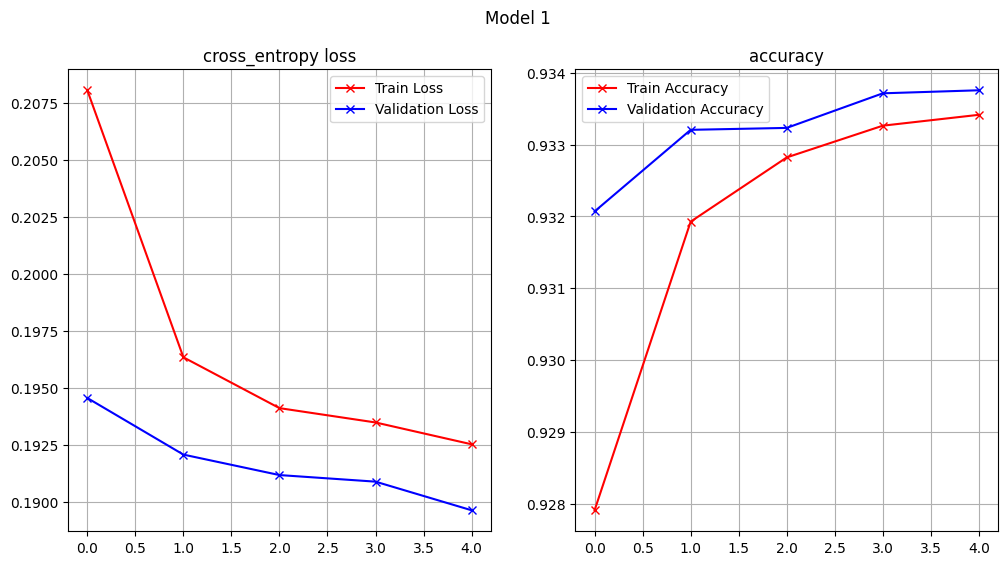

In [28]:
plot_loss_accuracy(history, 'Model 1')
evaluation_results = model.evaluate(validation_generator, verbose=0)
print('Validation Loss:', evaluation_results[0])
print('Validation Accuracy:', evaluation_results[1])

#### **The graph shows that the accuracy is increasing and the loss is decreasing as the number of epochs increases. This indicates that the model containing 839,087 parameters is learning from the training data. Moreover, the validation accuracy achieves 93% with a loss of 0.18**

In [308]:
label_reports = classification_reports(y_true, y_pred, mlb.classes_)
for label, report in label_reports.items():
    print(label)
    print(classification_report(y_true[:, np.where(mlb.classes_ == label)[0][0]], y_pred[:, np.where(mlb.classes_ == label)[0][0]]))

Atelectasis
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     15622
           1       0.00      0.00      0.00      1683

    accuracy                           0.90     17305
   macro avg       0.45      0.50      0.47     17305
weighted avg       0.81      0.90      0.86     17305

Cardiomegaly
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16968
           1       0.00      0.00      0.00       337

    accuracy                           0.98     17305
   macro avg       0.49      0.50      0.50     17305
weighted avg       0.96      0.98      0.97     17305

Consolidation
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16744
           1       0.00      0.00      0.00       561

    accuracy                           0.97     17305
   macro avg       0.48      0.50      0.49     17305
weighted avg       0.94      0.97  

#### **The classification report indicates that the model shows good performance only in predicting the majority class which is "0". However, it clearly struggles in detecting the minority class. This issue could be the result of having an imbalance classes. Example, for Hernia label, there's only 35 data in positive class, but there's a large data in negative class which is around 17,000.**

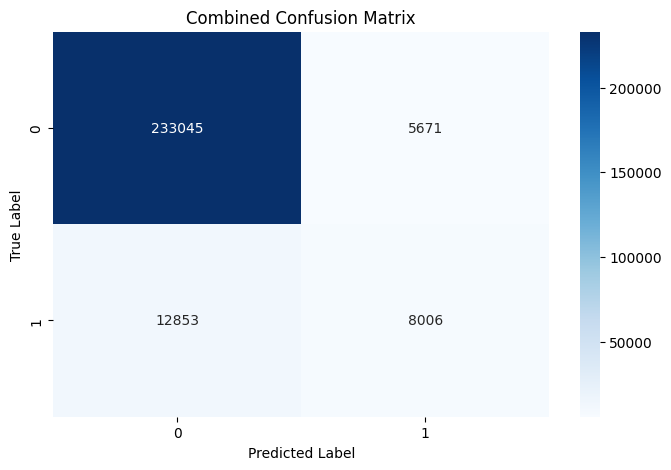

In [286]:
confusion_matrix(y_true, y_pred)

#### **The combined labels for confusion matrix shows that the model is mostly correct on predicting the label 0, but it still got mistake for about 2.4%. Meanwhile, for predicting the label 1, the model is only correct for about 38%, and predicted inaccurately for about 62%. This also indicates how the model is having a difficulty in predicting the minor class.**

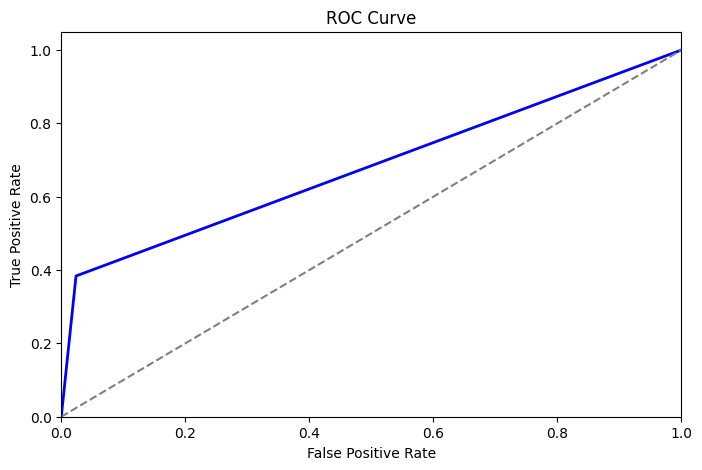

ROC AUC Score: 0.6800


In [287]:
plot_roc_curve(y_true, y_pred)

#### **The ROC AUC score of 68% and the curve above is not really good. This means that the model cannot accurately distinguish between the positive and negative classes. It is mainly because of the model's performance in predicting the minor class.**

--------

## **Training the CNN Model using the Modified Pre-trained Model**

- VGG19 

In [121]:
from keras.applications import VGG19

VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(target_width, target_height, 3))
VGG19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [122]:
# Freeze the convolutional layers except the last four layers

for layer in VGG19_model.layers[:-4]:
    layer.trainable = False

for layer in VGG19_model.layers[-4:]:
    layer.trainable = True

new_model = Sequential()

# Add the pre-trained VGG19 model
new_model.add(VGG19_model)
new_model.add(GlobalAveragePooling2D())  

# Fully connected layer with 1024 neurons
new_model.add(Dense(1024))
new_model.add(Activation('relu'))

# Dropout layer with dropout rate of 0.7
new_model.add(Dropout(0.7))
new_model.add(Dense(15))
new_model.add(Activation('sigmoid'))  

# Compile the model
new_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])
new_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
 4 (GlobalAveragePooling2D)                                      
                                                                 
 dense_52 (Dense)            (None, 1024)              525312    
                                                                 
 activation_806 (Activation  (None, 1024)              0         
 )                                                               
                                                                 
 dropout_29 (Dropout)        (None, 1024)              0         
                                                                 
 dense_53 (Dense)            (None, 15)              

In [123]:
# Train the model with early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

new_history = new_model.fit(
    train_generator,
    epochs=20,
    batch_size=batch_size,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/20
347/347 [==============================] - 2155s 6s/step - loss: 0.2020 - binary_accuracy: 0.9310 - val_loss: 0.1877 - val_binary_accuracy: 0.9351
Epoch 2/20
347/347 [==============================] - 2143s 6s/step - loss: 0.1899 - binary_accuracy: 0.9352 - val_loss: 0.1872 - val_binary_accuracy: 0.9353
Epoch 3/20
347/347 [==============================] - 2168s 6s/step - loss: 0.1879 - binary_accuracy: 0.9356 - val_loss: 0.1856 - val_binary_accuracy: 0.9356
Epoch 4/20
347/347 [==============================] - 2149s 6s/step - loss: 0.1872 - binary_accuracy: 0.9357 - val_loss: 0.1851 - val_binary_accuracy: 0.9358
Epoch 5/20
347/347 [==============================] - 2155s 6s/step - loss: 0.1859 - binary_accuracy: 0.9361 - val_loss: 0.1834 - val_binary_accuracy: 0.9362
Epoch 6/20
347/347 [==============================] - 2215s 6s/step - loss: 0.1858 - binary_accuracy: 0.9360 - val_loss: 0.1846 - val_binary_accuracy: 0.9361
Epoch 7/20
347/347 [==============================] 

In [325]:
y_pred_vgg = new_model.predict_generator(validation_generator)
y_pred_vgg = (y_pred_vgg > 0.5).astype(int)
y_true_vgg = validation_generator.labels

### **Evaluating the Model with VGG19**

- Plot of training and validation loss and accuracy
- Classification Report
- Confusion Matrix  
- ROC over AUC Metric

Validation Loss: 0.18961185216903687
Validation Accuracy: 0.9337338805198669


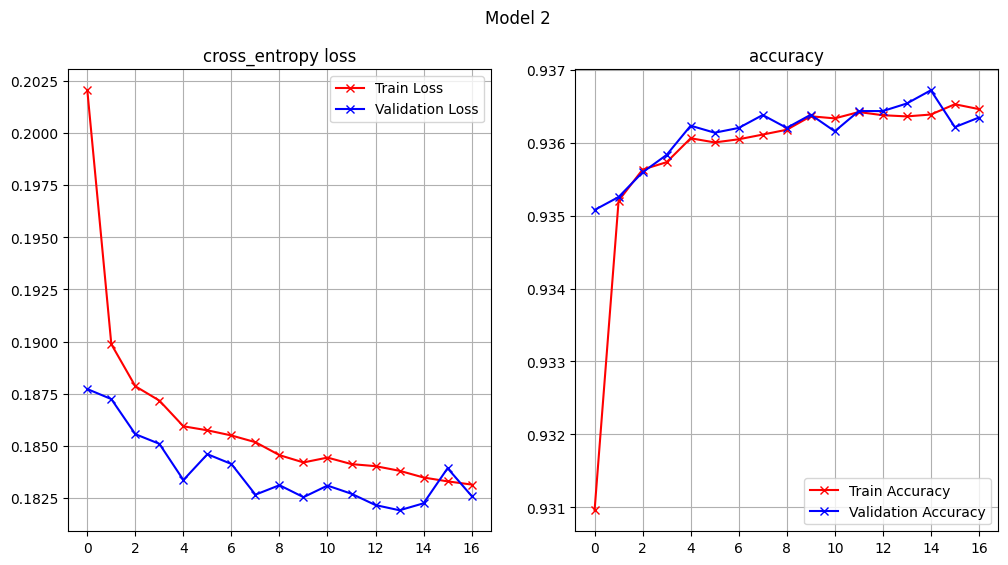

In [143]:
plot_loss_accuracy(new_history, 'Model 2')
evaluation_results = new_model.evaluate(validation_generator, verbose = 0)
print('Validation Loss:', evaluation_results[0])
print('Validation Accuracy:', evaluation_results[1])

#### **The graph shows consistency in improving for the training set. However, there's a slight fluctuations for the validation set. Compared to the first model, this has a lot more number of parameters which is 20,565,071. However, there's only a minimal increase in the validation accuracy. It's still around 93% with a loss of 0.18. This means that while the model has become more complex with the use of VGG19, its ability to predict labels has not really improved.** 

In [331]:
label_reports = classification_reports(y_true_vgg, y_pred_vgg, mlb.classes_)
for label, report in label_reports.items():
    print(label)
    print(classification_report(y_true_vgg[:, np.where(mlb.classes_ == label)[0][0]], y_pred_vgg[:, np.where(mlb.classes_ == label)[0][0]]))

Atelectasis
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     15622
           1       0.00      0.00      0.00      1683

    accuracy                           0.90     17305
   macro avg       0.45      0.50      0.47     17305
weighted avg       0.81      0.90      0.86     17305

Cardiomegaly
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16968
           1       0.00      0.00      0.00       337

    accuracy                           0.98     17305
   macro avg       0.49      0.50      0.50     17305
weighted avg       0.96      0.98      0.97     17305

Consolidation
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16744
           1       0.00      0.00      0.00       561

    accuracy                           0.97     17305
   macro avg       0.48      0.50      0.49     17305
weighted avg       0.94      0.97  

#### **The classification report is quite similar with the result from the previous model. Despite of adding layers from VGG19 and multiple trials for adjusting and fine-tuning the model, it's still struggling in predicting the minor class due to the imbalance dataset.** 

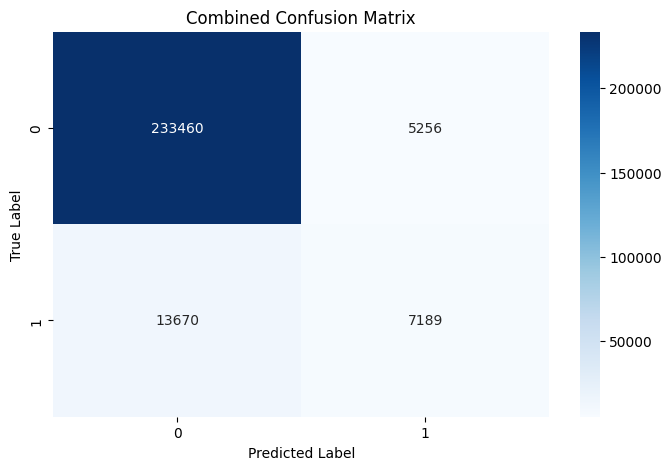

In [332]:
confusion_matrix(y_true_vgg, y_pred_vgg)

#### **The combined labels for confusion matrix indicates that the model is performing better for negative class than positive class. For label 0, it got 2.2% mistake in predicting, while 65% wrong predictions for negative class. The result is also almost similar to the previous model.**

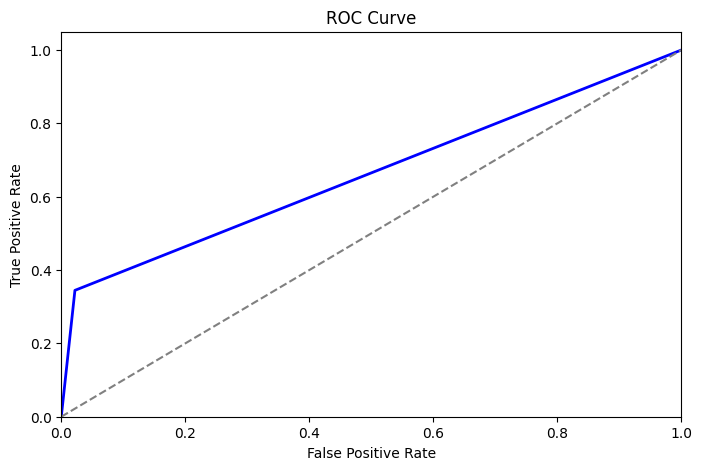

ROC AUC Score: 0.6613


In [333]:
plot_roc_curve(y_true_vgg, y_pred_vgg)

#### **Despite of trials for fine-tuning and adjusting the parameters of the model, the ROC AUC score did not improve at all. Exploring other advanced techniques may give improvements to this model.**

-------------

## **Testing the Models using Test Data**

In [324]:
new_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
testing_dataset = new_datagen.flow_from_dataframe(
    dataframe=dataset_test,
    directory=None,
    x_col='Paths',  
    y_col=mlb.classes_,  
    target_size=(target_width, target_height),
    batch_size=batch_size,
    class_mode='raw'
)

Found 25595 validated image filenames.


### **Using the Model from Scratch**

In [335]:
y_pred_test = model.predict(testing_dataset)
y_pred_test = (y_pred_test > 0.5).astype(int)
y_true_test = dataset_test[mlb.classes_].values

128/128 [==============================] - 453s 4s/step


In [337]:
score = binary_accuracy(y_true_test, y_pred_test)
print('Accuracy:', score)

Accuracy: 0.8957556814481994


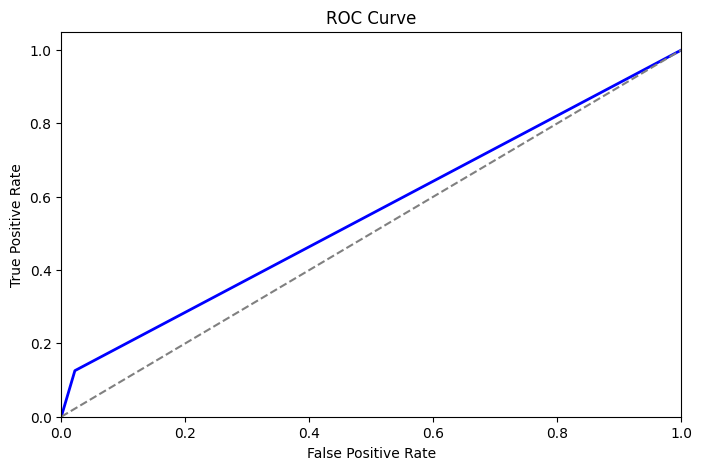

ROC AUC Score: 0.5518


In [338]:
plot_roc_curve(y_true_test, y_pred_test)

### **Using the Pre-trained Model**

In [336]:
y_pred_test_vgg = new_model.predict(testing_dataset)
y_pred_test_vgg = (y_pred_test_vgg > 0.5).astype(int)
y_true_test_vgg = dataset_test[mlb.classes_].values

128/128 [==============================] - 539s 4s/step


In [339]:
score = binary_accuracy(y_true_test_vgg, y_pred_test_vgg)
print('Accuracy:', score)

Accuracy: 0.8958129843068308


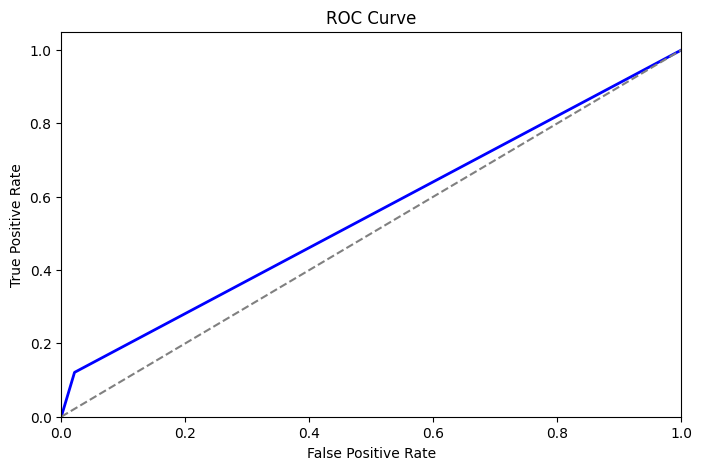

ROC AUC Score: 0.5498


In [340]:
plot_roc_curve(y_true_test_vgg, y_pred_test_vgg)

#### **For predicting the unseen data, the accuracy of both models is around 89.5%. However, their ROC AUC score is at 55%. This indicates that while the models are somehow good in making correct predictions overall, they may struggle with distinguishing between positive and negative classes.**

----

## **Conclusion**

#### **To sum up, I worked on creating and testing two different models to predict medical images. The first model was created from scratch, while the second one used a pre-trained model called VGG19. Both models showed similar performance, reaching around 93% accuracy in identifying different medical conditions. However, in analyzing other metrics like ROC AUC score, both models struggled to correctly predict the minor class due to an imbalance dataset. Even though both models did well in general, they weren't great at differentiating between the presence and absence of a certain conditions.**